In [122]:
import rdkit
import numpy as np
from rdkit import Chem
import pandas as pd
import torch
import copy
import EcConf as ecconf

In [203]:
df = pd.read_csv('test_ligands.csv')
df

,Unnamed: 0,Ligand_mol2_Strings,Ligand_mol2_Strings_without_X,Ligand_mol2_Strings_without_H,Ligand_mol2_Strings_without_XH,Ligand_Denticities,Graph_Hash_Ligand,Graph_Hash_Ligand_without_X,Graph_Hash_Ligand_without_H,Graph_Hash_Ligand_without_XH,Hemilabile,Connecting_Atom_Indices,Connecting_Atom_Indices_without_H,Connecting_Atom_Indices_without_X,Connecting_Atom_Indices_without_XH,SMILES_without_X_molsimplify,SMILES_without_X_rdkit,Occurrences
0,0,@<TRIPOS>MOLECULE\nligand\n15\t15\t1\nSMALL\nP...,@<TRIPOS>MOLECULE\n\n14\t14\t1\nSMALL\nPartial...,@<TRIPOS>MOLECULE\n\n11\t11\t1\nSMALL\nPartial...,@<TRIPOS>MOLECULE\n\n10\t10\t1\nSMALL\nPartial...,1,1c7ad85f17b9eff49fe72b778c3c34f6,3e9c127ae89c7d7c70476bc3edd0146d,de1136ccc9f1a20bb65275e3db4200d1,cf794afe3aca095cb66e4686e2c400e9,True,[11],[7],[11],[7],Clc1cccc(c1)C(=O)[O],O=C([O-])c1cccc(Cl)c1,33
1,1,@<TRIPOS>MOLECULE\nligand\n4\t3\t1\nSMALL\nPar...,@<TRIPOS>MOLECULE\n\n3\t2\t1\nSMALL\nPartialCh...,@<TRIPOS>MOLECULE\n\n2\t1\t1\nSMALL\nPartialCh...,@<TRIPOS>MOLECULE\n\n1\t0\t1\nSMALL\nPartialCh...,1,de39b424f3c3457188364891b9317dba,e5206dd18f7e829cf77fae1a48e7b0b9,d4f3d1d61e49aeb0a0ac5b8b146d86cc,de75f5edfabdb0477e652512e4287161,False,[0],[0],[0],[0],O,O,34348
2,2,@<TRIPOS>MOLECULE\nligand\n21\t22\t1\nSMALL\nP...,@<TRIPOS>MOLECULE\n\n20\t19\t1\nSMALL\nPartial...,@<TRIPOS>MOLECULE\n\n8\t9\t1\nSMALL\nPartialCh...,@<TRIPOS>MOLECULE\n\n7\t6\t1\nSMALL\nPartialCh...,3,d750f0dd3c8f3f3239ca016adc2e4fd8,03da74c428d73bd0cce03611bc1912b2,4973f8f4fe2953d0cd36790f18f93ec6,0c891e5805b76e96da6ba1df9bddd4b5,True,"[1, 4, 13]","[1, 4, 7]","[0, 3, 12]","[0, 3, 6]",NCCNCCN,NCCNCCN,729
3,3,@<TRIPOS>MOLECULE\nligand\n15\t15\t1\nSMALL\nP...,@<TRIPOS>MOLECULE\n\n14\t14\t1\nSMALL\nPartial...,@<TRIPOS>MOLECULE\n\n8\t8\t1\nSMALL\nPartialCh...,@<TRIPOS>MOLECULE\n\n7\t7\t1\nSMALL\nPartialCh...,1,b96a9c7f7079d2d2d6f17e3c963742ce,6f7dcaf05c67ea0280785c1da69f60be,3f4a40869b0294b5c284a65d20a3b274,92988d01351387cb00626cb5652e8fc3,True,[0],[0],[0],[0],CC1=CC=[C]C=C1,Cc1cc[c]cc1,175
4,4,@<TRIPOS>MOLECULE\nligand\n12\t13\t1\nSMALL\nP...,@<TRIPOS>MOLECULE\n\n11\t11\t1\nSMALL\nPartial...,@<TRIPOS>MOLECULE\n\n8\t9\t1\nSMALL\nPartialCh...,@<TRIPOS>MOLECULE\n\n7\t7\t1\nSMALL\nPartialCh...,2,04297c886adca1ea304eed3f9ee37da5,78571a62707b266b7547ec8fad857d32,3e1ceb0125d14567937ae2291ce697a7,e491c8dae119d25956bda1315728fc54,True,"[9, 11]","[5, 7]","[9, 10]","[5, 6]",S=C1[CH]C=CC=N1,[S-]c1ccccn1,264


In [200]:
def get_metal_coords_from_mol2(mol2block):
    for s in mol2block.split('\n'):
        if 'X1' in s:
            coords = np.array([float(p) for p in s.split('\t')[1].split()[:3]])
    return coords

In [213]:
def mol_with_metal(mol2block, mol2block_with_metal):
    mol = Chem.MolFromMol2Block(mol2block)
    m = Chem.RWMol(mol)
    metal_idx = m.AddAtom(Chem.Atom(26))
    coords = get_metal_coords_from_mol2(mol2block_with_metal)
    m.GetConformer().SetAtomPosition(metal_idx, coords)
    return m.GetMol()

In [214]:
new_df = df.apply(lambda x: mol_with_metal(x['Ligand_mol2_Strings_without_X'], x['Ligand_mol2_Strings']), axis=1)

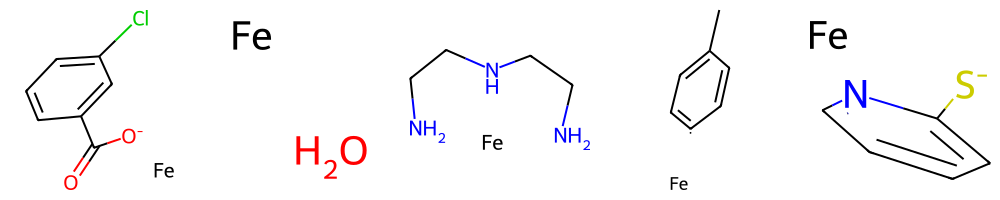

In [215]:
Chem.Draw.MolsToImage(new_df.values)

In [220]:
Molgraph(rdmol_to_data(new_df[3]).rdmol)

In [99]:
def rdmol_to_data(mol, smiles=None):
    assert mol.GetNumConformers() == 1
    N = mol.GetNumAtoms()

    pos = torch.tensor(mol.GetConformer(0).GetPositions(), dtype=torch.float32)

    atomic_number = []
    aromatic = []
    sp = []
    sp2 = []
    sp3 = []
    num_hs = []
    for atom in mol.GetAtoms():
        atomic_number.append(atom.GetAtomicNum())
        aromatic.append(1 if atom.GetIsAromatic() else 0)
        hybridization = atom.GetHybridization()
        # sp.append(1 if hybridization == HybridizationType.SP else 0)
        # sp2.append(1 if hybridization == HybridizationType.SP2 else 0)
        # sp3.append(1 if hybridization == HybridizationType.SP3 else 0)

    z = torch.tensor(atomic_number, dtype=torch.long)

    row, col, edge_type = [], [], []
    for bond in mol.GetBonds():
        start, end = bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()
        row += [start, end]
        col += [end, start]
        edge_type += 2 * [BOND_TYPES[bond.GetBondType()]]

    edge_index = torch.tensor([row, col], dtype=torch.long)
    edge_type = torch.tensor(edge_type)

    perm = (edge_index[0] * N + edge_index[1]).argsort()
    edge_index = edge_index[:, perm]
    edge_type = edge_type[perm]

    row, col = edge_index
    hs = (z == 1).to(torch.float32)

    num_hs = scatter(hs[row], col, dim_size=N, reduce='sum').tolist()

    if smiles is None:
        smiles = Chem.MolToSmiles(mol)

    data = Data(atom_type=z, pos=pos, edge_index=edge_index, edge_type=edge_type,
                rdmol=copy.deepcopy(mol), smiles=smiles)
    #data.nx = to_networkx(data, to_undirected=True)

    return data

In [103]:
from rdkit.Chem.rdchem import BondType as BT

BOND_TYPES = {t: i for i, t in enumerate(BT.names.values())}
from torch_scatter import scatter
from torch_geometric.data import Data

In [124]:
d = rdmol_to_data(mol)
d

Data(edge_index=[2, 20], pos=[11, 3], atom_type=[11], edge_type=[20], rdmol=<rdkit.Chem.rdchem.Mol object at 0x7fa66b2fba50>, smiles='O=C([O-])c1cccc(Cl)c1.[Fe]')

In [189]:
from rdkit import Chem 
from rdkit.Chem import AllChem
from EcConf.utils.utils_np import *
from EcConf.comparm import *
import copy
import torch 
import networkx as nx
from EcConf.utils.utils_graphroute import *
from EcConf.utils.utils_rdkit import *
import random 

class Molgraph:
    def __init__(self,rdkitmol,boltzmannweight = None, totalenergy = None, atom_type = None, edge_index = None, edge_type = None, idx = None, smiles='',RemoveHs=True):
        self.smiles=smiles
        self.atoms=[atom.GetAtomicNum() for atom in rdkitmol.GetAtoms()] #每一个原子的边个数
        self.atoms=np.array(self.atoms)
        self.chiraltags=[GP.chiral_types.index(atom.GetChiralTag()) for atom in rdkitmol.GetAtoms()]
        self.chiraltags=np.array(self.chiraltags)
        self.natoms=len(self.atoms)
        self.adjs=np.zeros((self.natoms,self.natoms))
        
        #增加boltzmannweight，totalenergy字段，用于标识构象在分子中的位置
        self.boltzmannweight = boltzmannweight
        self.totalenergy     = totalenergy
        self.atom_type       = atom_type
        self.edge_index      = edge_index #这个是局部编号的，里面的原子编号是从0开始到|all_atoms| - 1, 所以该值可以不保存，但也没问题，因为早晚都要局部编号的
        self.edge_type       = edge_type
        self.idx             = idx
        
            
        for bond in rdkitmol.GetBonds():
            a1=bond.GetBeginAtom().GetIdx()
            a2=bond.GetEndAtom().GetIdx()
            bt=bond.GetBondType() 
            ch=GP.bond_types.index(bt)
            self.adjs[a1,a2]=ch+1
            self.adjs[a2,a1]=ch+1
        #self.zmats=np_adjs_to_zmat(adjs_onek)
        self.coords=np.array(rdkitmol.GetConformer(0).GetPositions())
        self.Standardrize()
        return 
    
    def RemoveHs(self):
        noH_idx=np.array([i for i in range(len(self.atoms)) if self.atoms[i]!=1])
        n_heavy_atoms=len(noH_idx)
        coords=self.coords[noH_idx]
        adjs=self.adjs[np.ix_(noH_idx,noH_idx)]
        self.atoms=self.atoms[noH_idx]

        self.adjs=adjs
        self.chiraltags=self.chiraltags[noH_idx]        
        self.coords=coords
        self.natoms=n_heavy_atoms
        return
    
    def PermIndex(self,mode='random'):
        if mode=='random':
            start_id=random.choice(np.arange(self.natoms).astype(int))
        else:
            start_id=0
        graph=nx.Graph()
        bonds=[]
        for i in range(self.natoms):
            for j in range(i+1,self.natoms):
                if self.adjs[i,j]!=0:
                    bonds.append((i,j))
        graph.add_edges_from(bonds)
        atom_order=bfs_seq(graph,start_id)
        self.atoms=self.atoms[np.ix_(atom_order)]
        self.chiraltags=self.chiraltags[np.ix_(atom_order)]
        self.coords=self.coords[np.ix_(atom_order)]
        self.adjs=self.adjs[np.ix_(atom_order,atom_order)]
        return
     
    def Generate_Zmats(self):
        adjs_onek=Adjs_to_Onek(self.adjs)
        zmats=np_adjs_to_zmat(adjs_onek)[:,:4]
        return zmats
    
    def Standardrize(self):
        self.RemoveHs()
        # self.PermIndex(mode='random')
        self.PermIndex(0)
        self.zmats=self.Generate_Zmats()
        return 

    def Get_3D_Graph_Tensor(self,max_atoms= None):
        if max_atoms:
            adjs=torch.zeros((max_atoms,max_atoms)).long()
            zmats=torch.zeros((max_atoms,4)).long()
            coords=torch.zeros((max_atoms,3))
            masks=torch.zeros(max_atoms).bool()
            masks[:self.natoms]=True
            if not GP.if_chiral:
                atom_idx=torch.zeros(max_atoms).long()
                atom_chiraltags=torch.zeros(max_atoms).long()
                atom_idx_=Atoms_to_Idx(self.atoms,GP.atom_types)
                atom_idx[:self.natoms]=torch.Tensor(atom_idx_).long()
                atom_chiraltags[:self.natoms]=torch.Tensor(self.chiraltags).long()
            else:
                atom_idx = torch.zeros((max_atoms,len(GP.atom_types)))
                atom_chiraltags = torch.zeros((max_atoms,len(GP.chiral_types)))
                atom_idx_ = Atoms_to_Onek(self.atoms,GP.atom_types)
                #print (self.__dict__.keys())
                atom_chiraltags_ = Chiraltag_to_Onek(self.chiraltags,GP.chiral_types)
                atom_idx[:self.natoms] = torch.Tensor(atom_idx_)
                atom_chiraltags[:self.natoms] = torch.Tensor(atom_chiraltags_)
            #print (self.natoms,self.atoms,self.zmats,self.adjs)
            zmats[:self.natoms] = torch.Tensor(self.zmats).long()
            adjs[:self.natoms,:self.natoms] = torch.Tensor(self.adjs).long()
            coords[:self.natoms] = torch.Tensor(self.coords)
            return atom_idx, atom_chiraltags, adjs, coords, zmats, masks
        else:
            #print (self.natoms)
            atom_idx_=Atoms_to_Idx(self.atoms,GP.atom_types)
            return torch.Tensor(atom_idx_).long(),torch.Tensor(self.chiraltags),torch.Tensor(self.adjs).long(),torch.Tensor(self.coords),torch.Tensor(self.zmats).long(),torch.ones(self.natoms).bool()    

    
    def Trans_to_Rdkitmol(self):
        molecule=Chem.RWMol()
        for j in range(self.natoms):
            new_atom=Chem.Atom(int(self.atoms[j]))
            molecule_idx=molecule.AddAtom(new_atom)
        adjs=copy.deepcopy(self.adjs)
        row,col=np.diag_indices_from(adjs)
        adjs[row,col]=0
        idx1,idx2=np.where(adjs!=0)
        for id1,id2 in zip(idx1,idx2):
            if id1<id2:
                molecule.AddBond(int(id1),int(id2),GP.bond_types[int(adjs[id1,id2])-1])
        mol=molecule.GetMol()
        Chem.SanitizeMol(mol)
        AllChem.Compute2DCoords(mol)
        mol=Change_mol_xyz(mol,self.coords)
        return mol
    def Update_Coords(self,coords):
        self.coords=coords

def Adjs_to_Onek(adjs,nchannels=3):
    # nchannels=int(np.max(adjs)-1)
    nchannels=4
    adjs_onek=np.zeros((adjs.shape[0],adjs.shape[0],nchannels))
    idx1,idx2=np.where(adjs)
    channel_idx=adjs[idx1,idx2].astype(int)-1
    for id1,id2,cid in zip(idx1,idx2,channel_idx):
        adjs_onek[id1,id2,cid]=1
    return adjs_onek.astype(int)

def Atoms_to_Idx(atoms,possible_atom_types=[1,6,7,8,9,15,16,17,35,53]):
    atom_idx_=[possible_atom_types.index(int(a))+1 for a in atoms] 
    return atom_idx_

def Atoms_to_Onek(atoms,possible_atom_types=[1,6,7,8,9,15,16,17,35,53]):
    atoms_onek=np.zeros((len(atoms),len(possible_atom_types)))
    for i in range(len(atoms)):
        atoms_onek[i][possible_atom_types.index(atoms[i])]=1
    return atoms_onek.astype(int)
def Chiraltag_to_Onek(chiraltags,chiral_types=[ ChiralType.CHI_UNSPECIFIED, ChiralType.CHI_TETRAHEDRAL_CW, ChiralType.CHI_TETRAHEDRAL_CCW, ChiralType.CHI_OTHER, ChiralType.CHI_TETRAHEDRAL, ChiralType.CHI_ALLENE, ChiralType.CHI_SQUAREPLANAR, ChiralType.CHI_TRIGONALBIPYRAMIDAL,ChiralType.CHI_OCTAHEDRAL]):
    ntags=len(chiral_types)
    chiral_onek=np.zeros((len(chiraltags),ntags))
    for i in range(len(chiraltags)):
        chiral_onek[i][chiraltags[i]]=1
    return chiral_onek.astype(int)

In [162]:
d.edge_type

tensor([12, 12,  1, 12, 12, 12, 12,  1, 12, 12, 12, 12, 12, 12,  1,  1,  2,  1,
         2,  1])

In [163]:
d.edge_index

tensor([[0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 6, 7, 8, 9],
        [1, 5, 6, 0, 2, 1, 3, 9, 2, 4, 3, 5, 0, 4, 0, 7, 8, 6, 6, 2]])

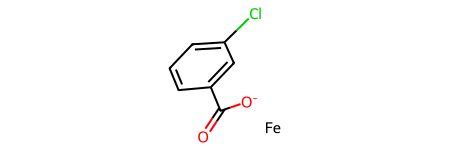

In [172]:
d.rdmol

In [190]:
a = Molgraph(mol, 0, 0, d.atom_type, edge_index=d.edge_index, edge_type=d.edge_type, idx=0, smiles=d.smiles, RemoveHs=False)

In [191]:
a.zmats

array([[0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [2., 0., 1., 0.],
       [3., 0., 1., 2.],
       [4., 1., 0., 2.],
       [5., 2., 0., 1.],
       [6., 3., 0., 1.],
       [7., 3., 0., 1.],
       [8., 4., 1., 0.],
       [9., 4., 1., 0.]])

In [142]:
adjs = a.adjs
idx1,idx2=np.where(a.adjs)
channel_idx=adjs[idx1,idx2].astype(int)-1
idx1, idx2, channel_idx

(array([0, 1, 1, 1, 2, 2, 2, 3, 4, 4, 5, 5, 6, 6, 6, 7, 7, 8, 8, 9]),
 array([1, 0, 2, 3, 1, 4, 5, 1, 2, 6, 2, 7, 4, 8, 9, 5, 8, 6, 7, 6]),
 array([0, 0, 0, 1, 0, 3, 3, 1, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0]))